# Loan Status Classification

# Project Description:

# Part-1: Data Exploration and Pre-processing

# 1) load the given dataset 

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report,accuracy_score, roc_curve,roc_auc_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [3]:
data=pd.read_csv(r"E:\GANESH\ML\Loan Status Classification\EXCEL - Naive Bayes Loan Status Classification.csv")

In [4]:
data

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


# 2) check the null values

In [5]:
data.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

# 3) print the column names 

In [6]:
data.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

# 4) create list for all the columns which have null values columns

In [7]:
lis=[]

In [8]:
for col in data.columns:
    if (data[col].isnull().any()):
        lis.append(col)
        print(col)

BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6


In [9]:
lis

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

# 5) fill all the null values with mean using for loops

In [10]:
for i in lis:
    data[i]=data[i].fillna(data[i].mean())

In [11]:
data.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

In [12]:
data

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000,Default


# 6) get data information

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


# 7) describe dataset 

In [14]:
data.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


# 8) display box plot for LIMIT_BAL

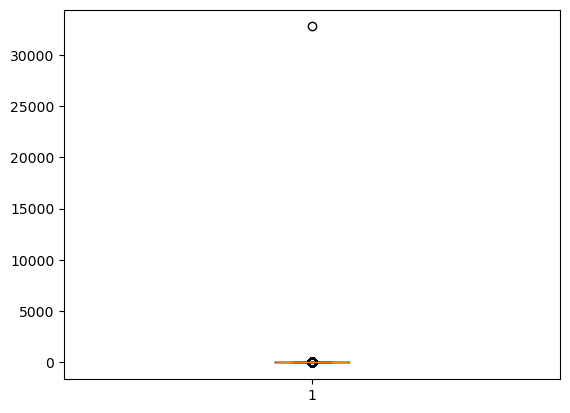

In [15]:
plt.boxplot(data["LIMIT_BAL"]);

# 9) display box plot for age 

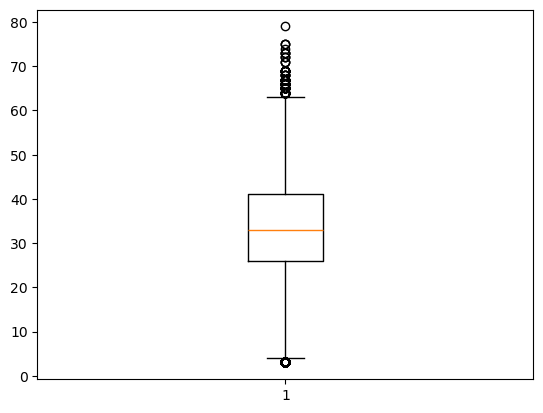

In [16]:
plt.boxplot(data["AGE"]);

# 10) drop all the null values

In [17]:
data.dropna(inplace=True)

In [18]:
data

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000,Default


In [19]:
# We Can See There Is No Null Data That's Why The Data Should Be Remain As It Is....

# 11) perform encoding on default status 

In [20]:
# We Should Go With The Normal Encoding Method Using The 'replace()' Method Like...

In [21]:
data["Default Status"].unique()

array(['Default', 'Not Default'], dtype=object)

In [22]:
data["Default Status"].replace(['Default', 'Not Default'],[0,1],inplace=True)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_5272\2936718797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Default Status"].replace(['Default', 'Not Default'],[0,1],inplace=True)
C:\Users\Vishal\AppData\Local\Temp\ipykernel_5272\2936718797.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [23]:
data

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576,0
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000,0
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000,1
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000,1
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000,1
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576,1
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000,0
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000,0


# Part-2: Working with Models 

# 1) Create a features and target dataset 

In [24]:
x=data.drop("Default Status",axis=1)

In [25]:
y=data["Default Status"]

In [26]:
x

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000


In [27]:
y

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: Default Status, Length: 30000, dtype: int64

In [28]:
# Above Both The Feature and Target Data Sets Are Created Successfully....

# 2) Split data into training and testing 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 10)

In [31]:
x_train.shape

(21000, 15)

# 3) Fit the Gaussian naive bayes classifier

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 40)

In [33]:
from sklearn.naive_bayes import GaussianNB 

In [34]:
model = GaussianNB()

In [35]:
model.fit(x_train, y_train)

GaussianNB()

In [36]:
# Here The Model Is Created and Also Successfully Fitted With The Training Data...

# 4) Print the training and

In [37]:
model.score(x_train,y_train)

0.7608888888888888

# 5) Print the testing score 

In [38]:
model.score(x_test,y_test)

0.7630666666666667

# 6) Find the accuracy score

In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report 

In [40]:
accuracy_score(y_test, model.predict(x_test))

0.7630666666666667

# 7) Find the precision score

In [41]:
precision_score(y_test, model.predict(x_test))

0.7787791888570258

# 8) Find the recall score

In [42]:
recall_score(y_test, model.predict(x_test))

0.9732081911262799

# 9) Find the Confusion matrix

In [43]:
confusion_matrix(y_test, model.predict(x_test))

array([[  20, 1620],
       [ 157, 5703]], dtype=int64)

In [44]:
# We Can Also See The Heatmap Of It Like...

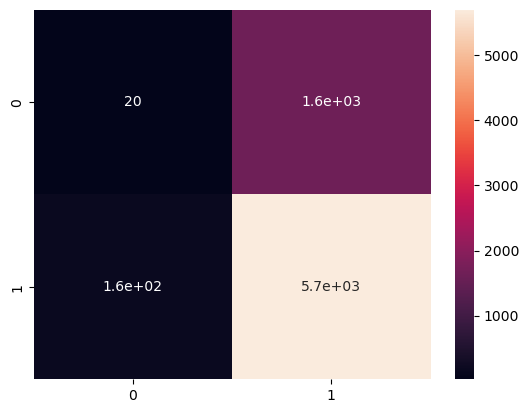

In [45]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot = True);

# 10) Find the Classification report

In [46]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.11      0.01      0.02      1640
           1       0.78      0.97      0.87      5860

    accuracy                           0.76      7500
   macro avg       0.45      0.49      0.44      7500
weighted avg       0.63      0.76      0.68      7500

